In [59]:
from web3 import Web3, HTTPProvider
import json
import rlp
from eth_typing import HexStr
from eth_utils import to_bytes
import math
import matplotlib.pyplot as plt

In [136]:
w3 = Web3(Web3.HTTPProvider('http://127.0.0.1:8545'))
w3.is_connected()
len(w3.eth.accounts)

251

In [142]:
decimals = 18
accounts = w3.eth.accounts
keys = json.load(open('./keys.json'))['private_keys']
AbiPath = './build/contracts/'
AMMabi = json.load(open(AbiPath + 'CPAMM.json'))['abi']
Energyabi = json.load(open(AbiPath + 'EnergyToken.json'))['abi']
Moneyabi = json.load(open(AbiPath + 'MoneyToken.json'))['abi']
Testabi = json.load(open(AbiPath + 'Test.json'))['abi']

MoneyToken_address = Web3.to_checksum_address("0xe78A0F7E598Cc8b0Bb87894B0F60dD2a88d6a8Ab")
EnergyToken_address = Web3.to_checksum_address("0x5b1869D9A4C187F2EAa108f3062412ecf0526b24")
Amm_address = Web3.to_checksum_address("0xC89Ce4735882C9F0f0FE26686c53074E09B0D550")

AMMContract = w3.eth.contract(address=Amm_address,abi=AMMabi)
MoneyContract = w3.eth.contract(address=MoneyToken_address,abi=Moneyabi)
EnergyContract = w3.eth.contract(address=EnergyToken_address,abi=Energyabi)
Test = w3.eth.contract(address="0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B",abi = Testabi)

me = Web3.to_checksum_address(w3.eth.accounts[0])

def hex_to_bytes(data: str) -> bytes:
    return to_bytes(hexstr=HexStr(data))


In [131]:
AMMContract.functions.test(int(1000e18),int(1000e18)).call()/1e18

1.0

In [17]:
reserve0 = 40* 10 ** 18
reserve1 = 30* 10 ** 18
k_lower = 8 * 10 ** 16
k_upper = 34 * 10 ** 16
midpoint = 18 * 10** 17
steepness = 295 * 10 ** 16
e = 271828182845904523
print((steepness * (reserve0/(reserve1 - midpoint))))

4.1843971631205673e+18


In [47]:
math.e
def _get_price(_reserve0,_reserve1,k_lower,k_upper,midpoint,steepness):
    scale = 1
    factor =(k_upper - k_lower)/2
    print(factor)
    ratio = ((_reserve1 * scale)/_reserve0)
    print(ratio)
    nominator = ratio - midpoint
    print(nominator)
    denominator = math.sqrt(scale + (steepness * (ratio - midpoint) )**2)
    print(denominator)
    value = ((nominator * scale)/denominator)
    print(value)
    return factor * value + (k_lower + k_upper)/2
    

values = [_get_price(1,i,0,1,0.5,1) for i in [x/100 for x in range(-1000,1000,1)]]

0.5
-10.0
-10.5
10.547511554864494
-0.9954954725939521
0.5
-9.99
-10.49
10.537556642789637
-0.9954869383480679
0.5
-9.98
-10.48
10.52760181617827
-0.9954783798808654
0.5
-9.97
-10.47
10.517647075273063
-0.9954697971008097
0.5
-9.96
-10.46
10.507692420317603
-0.9954611899159339
0.5
-9.95
-10.45
10.4977378515564
-0.9954525582338368
0.5
-9.94
-10.44
10.487783369234892
-0.9954439019616804
0.5
-9.93
-10.43
10.477828973599445
-0.9954352210061876
0.5
-9.92
-10.42
10.467874664897359
-0.99542651527364
0.5
-9.91
-10.41
10.457920443376876
-0.9954177846698743
0.5
-9.9
-10.4
10.447966309287182
-0.9954090291002811
0.5
-9.89
-10.39
10.438012262878408
-0.9954002484698014
0.5
-9.88
-10.38
10.42805830440164
-0.9953914426829246
0.5
-9.87
-10.37
10.418104434108923
-0.9953826116436855
0.5
-9.86
-10.36
10.40815065225326
-0.9953737552556624
0.5
-9.85
-10.35
10.398196959088628
-0.9953648734219733
0.5
-9.84
-10.34
10.388243354869966
-0.9953559660452747
0.5
-9.83
-10.33
10.378289839853192
-0.995347033027758
0.5

In [ ]:
def sigmoid(_reserve0,_reserve1,k_lower,k_upper,midpoint,steepness):
    scale = 1
    factor =(k_upper - k_lower)/2
    print(factor)
    ratio = ((_reserve1 * scale)/_reserve0)
    print(ratio)
    nominator = ratio - midpoint
    print(nominator)
    denominator = math.sqrt(scale + (steepness * (ratio - midpoint) )**2)
    print(denominator)
    value = ((nominator * scale)/denominator)
    print(value)
    return factor * value + (k_lower + k_upper)/2

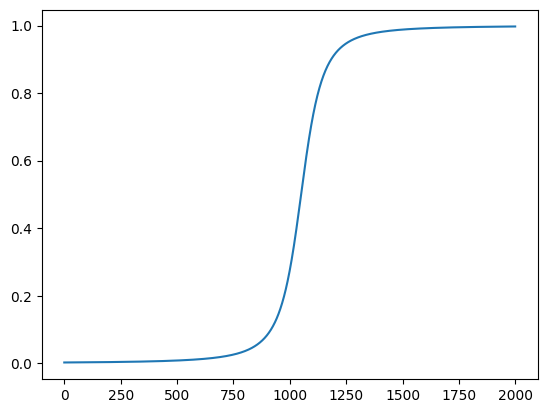

In [48]:
plt.plot(values)

In [8]:
AMMContract.functions.test().call()

1

In [144]:
AMMContract.functions._get_price(int(1e18),int(1e18)).call()/1e18


-2.6e+17

In [145]:
values = [AMMContract.functions._get_price(int(i * 1e18),int(10e18)).call() for i in [x for x in range(1,60,1)]]

ContractPanicError: ('Panic error 0x12: Division by zero.', '0x4e487b710000000000000000000000000000000000000000000000000000000000000012')

: 

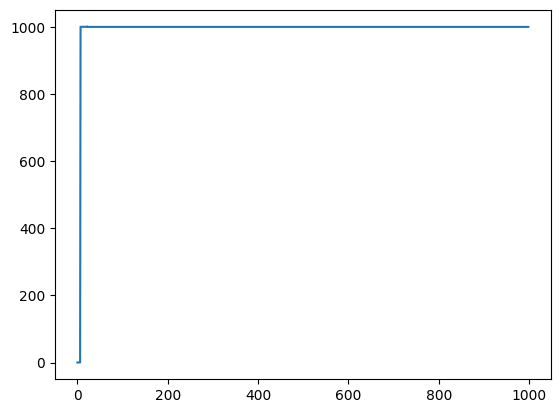

In [120]:
plt.plot([x/1e18 for x in values])

In [148]:
#Add 50 Liquidity to AMM
MoneyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})
EnergyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

AMMContract.functions.addLiquidity(50*10**18,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x39c8263cdd8bceb7acdcc31e09f7b7a5baed64e87653cacf3df1b11b64b2aaad')

In [151]:
MoneyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})
#Swap Energy to Money
AMMContract.functions.swap(MoneyToken_address,20*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x70e767b08f58dd0beeb6ddc24a910d3b8acdaa45c57b368be5346a8b9faf0d40')

In [144]:
MoneyContract.functions.approve("0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B",5*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x274658551076f44eb41cfbfa2a7aafd8b78252a14e54a90b24f851a76c7d016e')

In [145]:
x = Test.functions.send(5 * 10 ** 18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [147]:
MoneyContract.functions.balanceOf("0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B").call()

5000000000000000000

In [138]:
MoneyContract.functions.transferFrom(me,accounts[1],3*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x923cae33742b7694490d5925fe6bc94137b89b27c40a1f99c94a520a3c155713')

In [121]:
5 * 10**18

5000000000000000000

In [123]:
Test.functions.send(5 * 10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

Test.functions.add

ABIFunctionNotFound: ("The function 'send' was not found in this contract's abi.", ' Are you sure you provided the correct contract abi?')

In [152]:
print("Money: " + str(MoneyContract.functions.balanceOf(accounts[0]).call()) )
print("Energy: " + str(EnergyContract.functions.balanceOf(me).call()) )
print("AMM: "+ str(AMMContract.functions.get_reserve0().call()))

Money: 6999925000000000000000000
Energy: 6999969940000000000000000
AMM: 70000000000000000000


In [111]:
x= AMMContract.functions.addLiquidity(3000000000000000000,3000000000000000000).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [112]:
y = AMMContract.functions.swap(MoneyToken_address,3 * 10**decimals).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [95]:
AMMContract.functions.totalSupply().call()

0

In [88]:
w3.eth.get_transaction_receipt(x)


AttributeDict({'transactionHash': HexBytes('0xbd6153cd8d4943b87a50428dd623c7b039b55b9ede10ba1e0e68ae32604bc6ef'),
 'transactionIndex': 0,
 'blockNumber': 4,
 'blockHash': HexBytes('0x9c9086ca91576d777bb1134f17f062a9267c5894721f8801660dd927e47ee0c9'),
 'from': '0x90F8bf6A479f320ead074411a4B0e7944Ea8c9C1',
 'to': '0xCfEB869F69431e42cdB54A4F4f105C19C080A601',
 'cumulativeGasUsed': 29054,
 'gasUsed': 29054,
 'contractAddress': None,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 0

In [40]:
#MoneyContract.functions.transfer(accounts[1],7 * (10 ** decimal)).stransact({"from":me})
txs = rlp.decode(hex_to_bytes("0xf8a910850684ee180082e48694a0b86991c6218b36c1d19d4a2e9eb0ce3606eb4880b844a9059cbb000000000000000000000000b8b59a7bc828e6074a4dd00fa422ee6b92703f9200000000000000000000000000000000000000000000000000000000010366401ba0e2a4093875682ac6a1da94cdcc0a783fe61a7273d98e1ebfe77ace9cab91a120a00f553e48f3496b7329a7c0008b3531dd29490c517ad28b0e6c1fba03b79a1dee"), x)
txs.to_dict()

NameError: name 'to_bytes' is not defined

In [72]:
AMMContract.functions

AttributeError: 'Contract' object has no attribute 'methods'

In [13]:
MoneyToken_address = Web3.to_checksum_address("0xe78A0F7E598Cc8b0Bb87894B0F60dD2a88d6a8Ab")
EnergyToken_address = Web3.to_checksum_address("0x5b1869D9A4C187F2EAa108f3062412ecf0526b24")
Amm = Web3.to_checksum_address("0xC89Ce4735882C9F0f0FE26686c53074E09B0D550")

def swapMoney(address,amount):
    
    AMMContract.functions.swap(MoneyToken_address,amount)

In [5]:
# Get Contract
contract_address =Web3.to_checksum_address("0x5fbdb2315678afecb367f032d93f642f64180aa3")
contract = w3.eth.contract(address=contract_address,abi = abi)

In [14]:
contract = w3.eth.contract(address=Amm,abi = abi)